In [1]:
import torch
from torchvision import models, transforms
from PIL import Image
import os
import numpy as np

# Define a transformation pipeline to preprocess images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size of the model
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

# Load a pre-trained model, e.g., ResNet
model = models.resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    tensor = transform(image)
    return tensor

# Function to extract features
def extract_features(image_tensor):
    with torch.no_grad():
        features = model(image_tensor.unsqueeze(0))  # Add a batch dimension and extract features
    return features

# Load images from folder and preprocess them
folder_path = 'C:\\Users\\ilyas\\Desktop\\VIDEO2BLOG\\allframes'
image_tensors = [load_and_preprocess_image(os.path.join(folder_path, fname)) for fname in os.listdir(folder_path)]

# Extract features
feature_vectors = [extract_features(tensor) for tensor in image_tensors]

# Calculate cosine similarities between consecutive slides
cos = torch.nn.CosineSimilarity(dim=1)
cosine_similarities = [cos(feature_vectors[i], feature_vectors[i+1]) for i in range(len(feature_vectors)-1)]
# calculate manhattan and euclidean distances between consecutive slides
manhattan_distances = [torch.norm(feature_vectors[i] - feature_vectors[i+1], p=1) for i in range(len(feature_vectors)-1)]
euclidean_distances = [torch.dist(feature_vectors[i], feature_vectors[i+1]) for i in range(len(feature_vectors)-1)]





c:\Program Files\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Program Files\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Program Files\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\ilyas/.cache\torch\hub\checkpoin

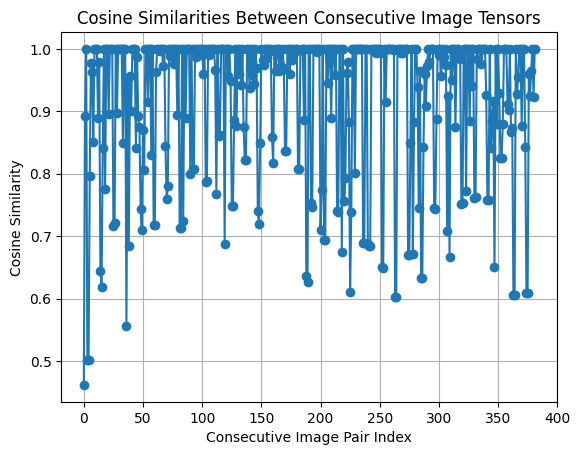

In [4]:
# Plotting the cosine similarities
plt.plot(cosine_similarities, marker='o', linestyle='-')
plt.title('Cosine Similarities Between Consecutive Image Tensors')
plt.xlabel('Consecutive Image Pair Index')
plt.ylabel('Cosine Similarity')
plt.grid(True)
plt.show()

In [3]:
import matplotlib.pyplot as plt

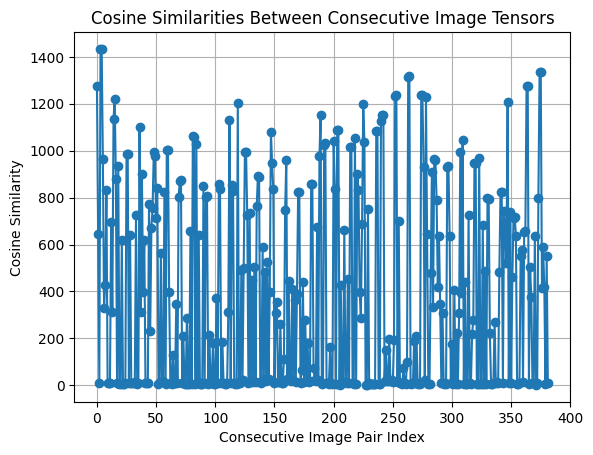

In [5]:
# Plotting the cosine similarities
plt.plot(manhattan_distances, marker='o', linestyle='-')
plt.title('Cosine Similarities Between Consecutive Image Tensors')
plt.xlabel('Consecutive Image Pair Index')
plt.ylabel('Cosine Similarity')
plt.grid(True)
plt.show()

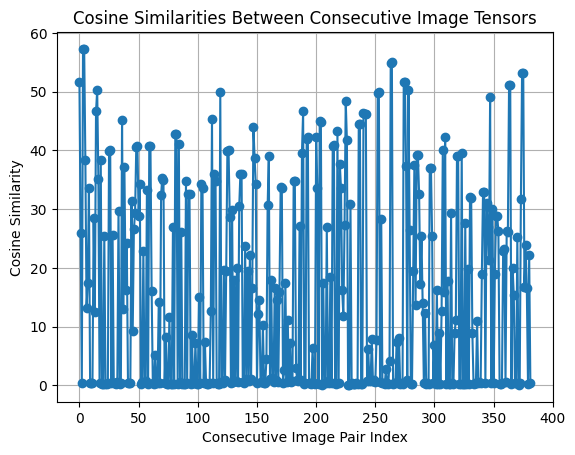

In [6]:
# Plotting the cosine similarities
plt.plot(euclidean_distances, marker='o', linestyle='-')
plt.title('Cosine Similarities Between Consecutive Image Tensors')
plt.xlabel('Consecutive Image Pair Index')
plt.ylabel('Cosine Similarity')
plt.grid(True)
plt.show()